In [125]:
#Data Analysis and Decision Tree Classifier for "WALMART STORE DATA".
#Author - Soumedhik Bharati.

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns

In [127]:
data = pd.read_csv('walmart_cleaned.csv')

In [128]:
#understanding the data

In [129]:
data.head() #Top 5 values

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [130]:
data.tail() #Bottom 5 values

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,423281,45,2012-10-26,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421566,423282,45,2012-10-26,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421567,423283,45,2012-10-26,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421568,423284,45,2012-10-26,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421569,423285,45,2012-10-26,0,98.0,1076.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


In [131]:
data.shape #Shows the shape of the numpy array storing the dataset.

(421570, 17)

In [132]:
data.describe() #statistical values regarding data

,Unnamed: 0,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,211611.321278,22.200546,0.070358,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,2.410088,136727.915739
std,122195.149363,12.785297,0.255750,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,0.000000,1.000000,0.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,34875.000000
25%,105782.250000,11.000000,0.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2.000000,93638.000000
50%,211603.500000,22.000000,0.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,3.000000,140167.000000
75%,317424.750000,33.000000,0.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,3.000000,202505.000000
max,423285.000000,45.000000,1.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,3.000000,219622.000000


In [133]:
data.columns #shows all of the column headers present in the dataset

Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [134]:
data.nunique() #unque values present in the data(no repeats)

Unnamed: 0      421570
Store               45
Date               143
IsHoliday            2
Dept                81
Weekly_Sales    359464
Temperature       3528
Fuel_Price         892
MarkDown1         2278
MarkDown2         1499
MarkDown3         1662
MarkDown4         1945
MarkDown5         2294
CPI               2145
Unemployment       349
Type                 3
Size                40
dtype: int64

In [135]:
data['IsHoliday'].nunique() #shows all the unique values present in a specific column

2

In [136]:
#cleaning the dataset

In [137]:
data.isnull().sum() #shows the sum of all the null values present inside the data for preprocessing

Unnamed: 0      0
Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [138]:
data = data.drop(['Date','Temperature','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1)
#Removing irrelevant columns to present a cleaner data to the model

In [139]:
data.head()

,Unnamed: 0,Store,IsHoliday,Dept,Weekly_Sales,Fuel_Price,CPI,Unemployment,Type,Size
0,0,1,0,1.0,24924.50,2.572,211.096358,8.106,3,151315
1,1,1,0,26.0,11737.12,2.572,211.096358,8.106,3,151315
2,2,1,0,17.0,13223.76,2.572,211.096358,8.106,3,151315
3,3,1,0,45.0,37.44,2.572,211.096358,8.106,3,151315
4,4,1,0,28.0,1085.29,2.572,211.096358,8.106,3,151315


In [140]:
#Relationship analysis

In [141]:
correlation = data.corr() #data.corr() is used to find the pairwise correlation of all columns

<Axes: >

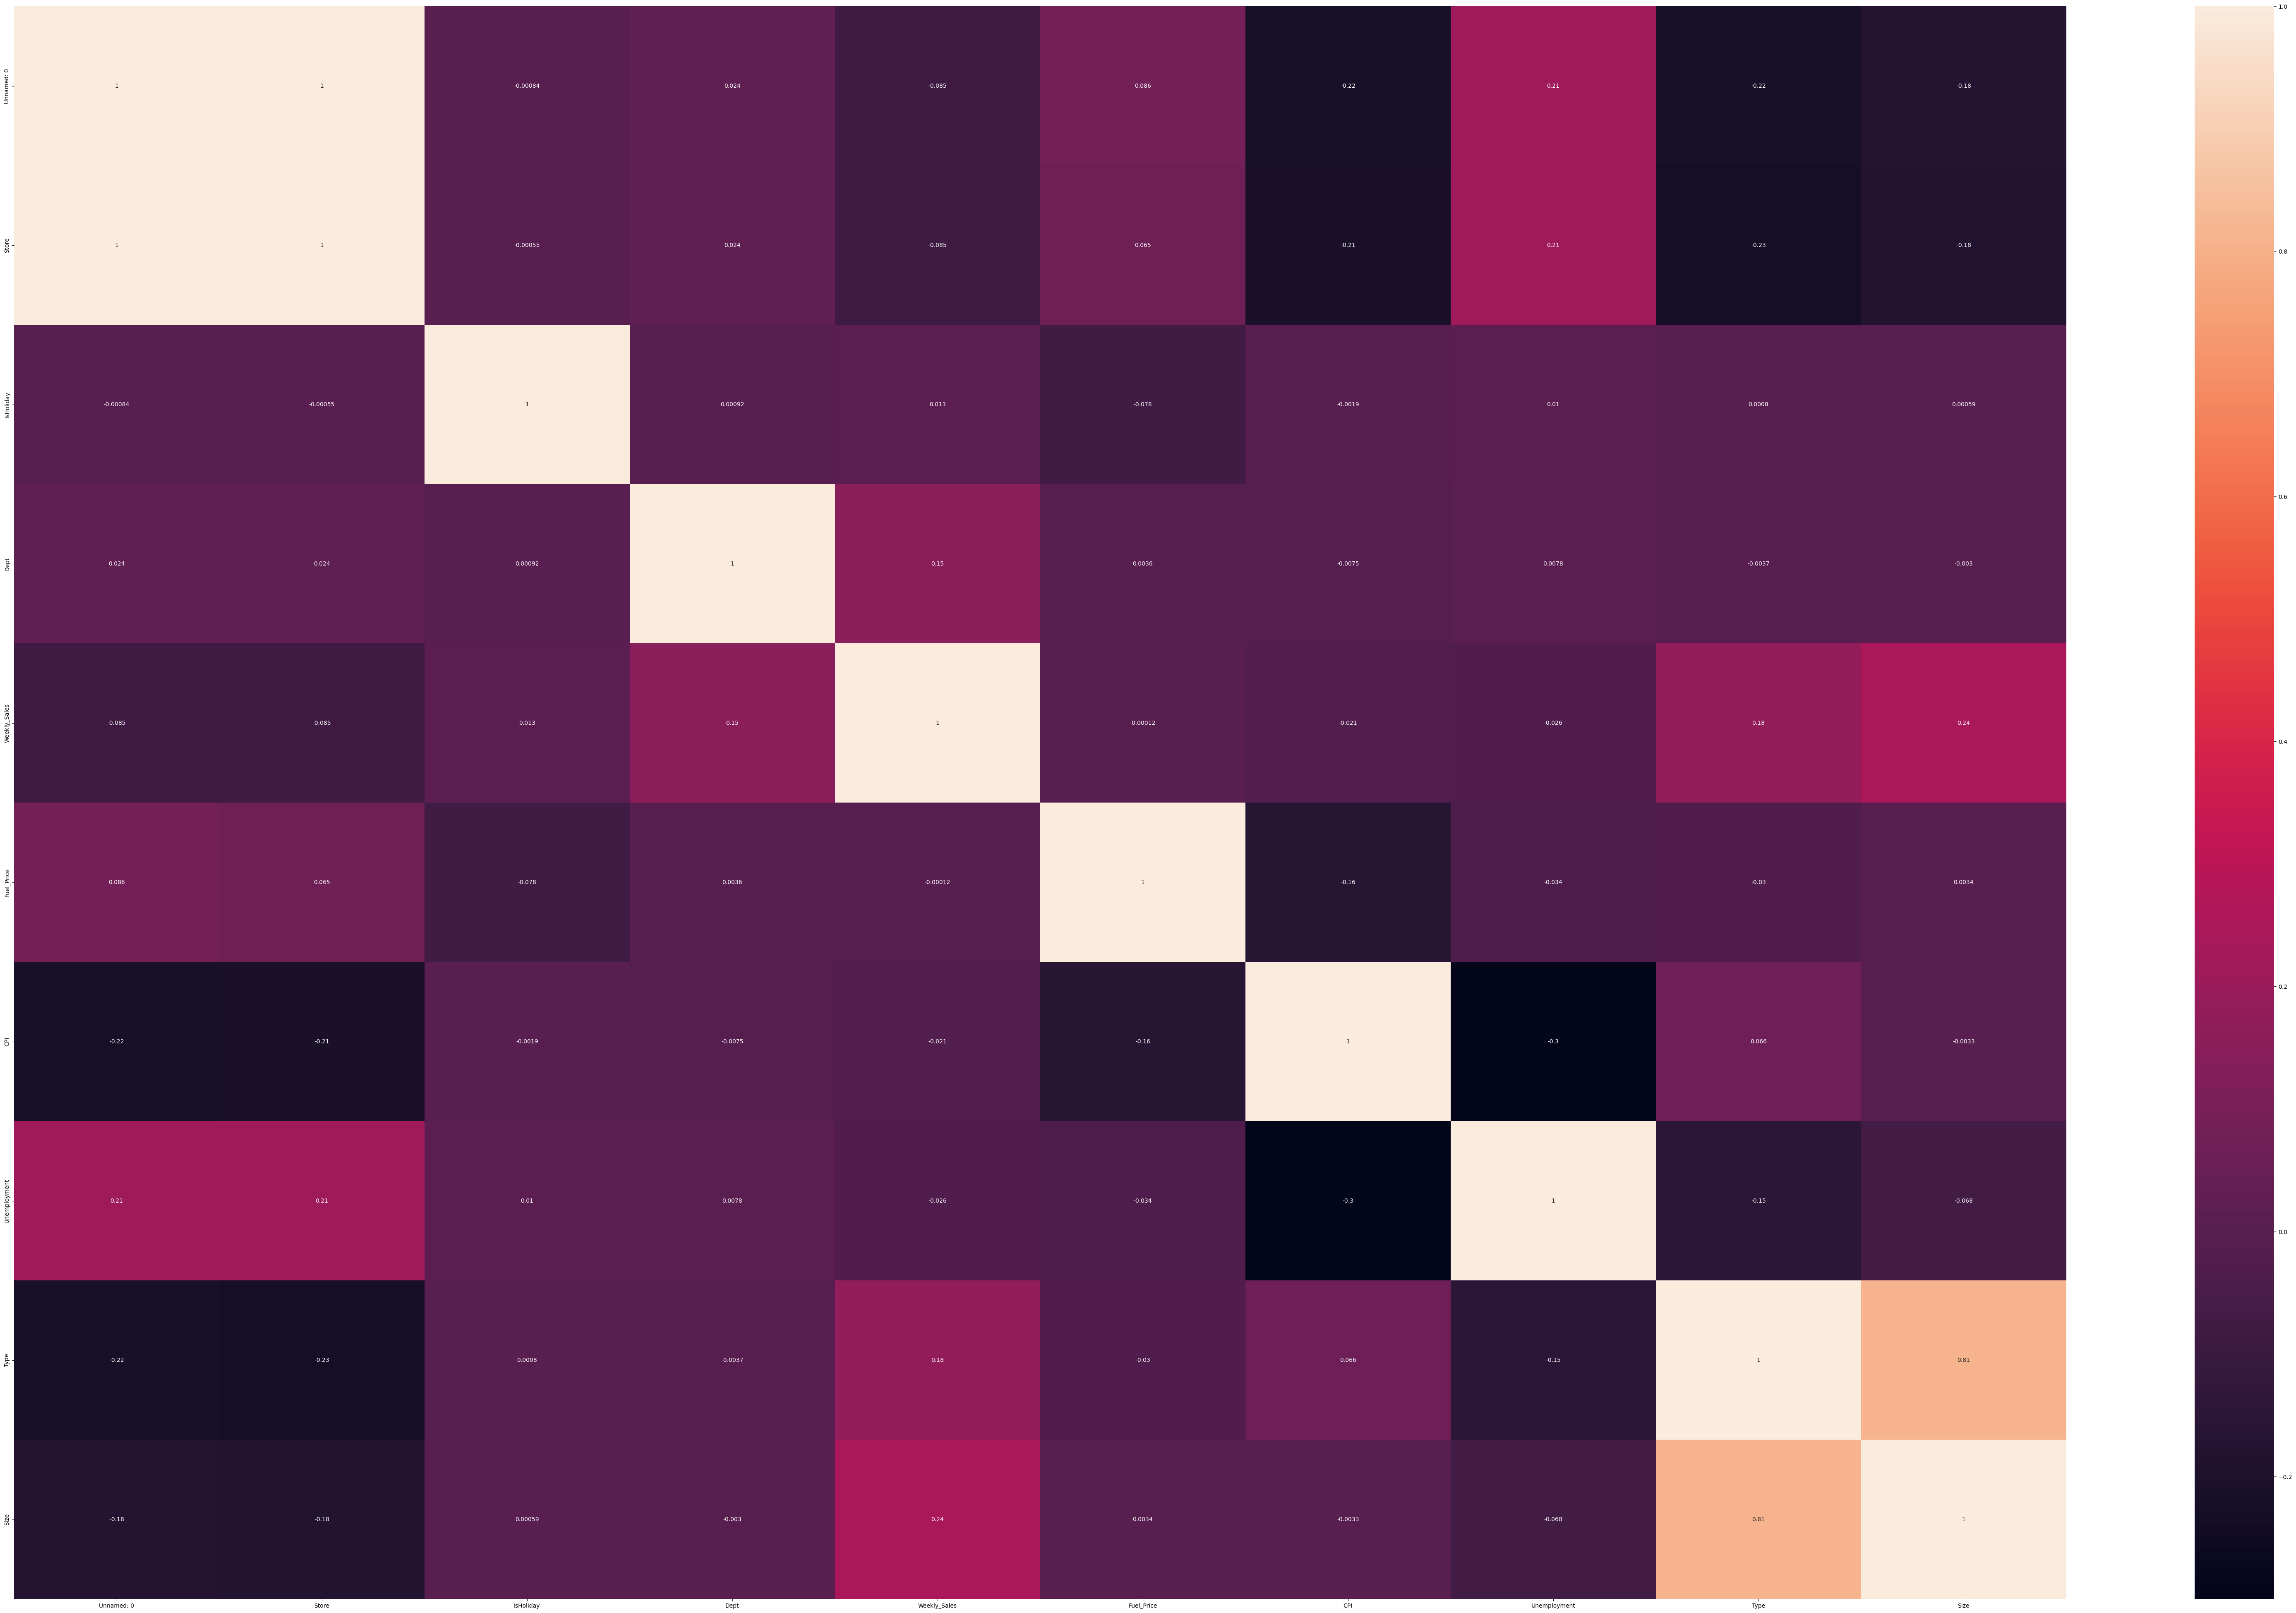

In [142]:
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)
#heatmap() annot (annotation) feature allows you to show the numerical value associated with each cell in a python seaborn heatmap

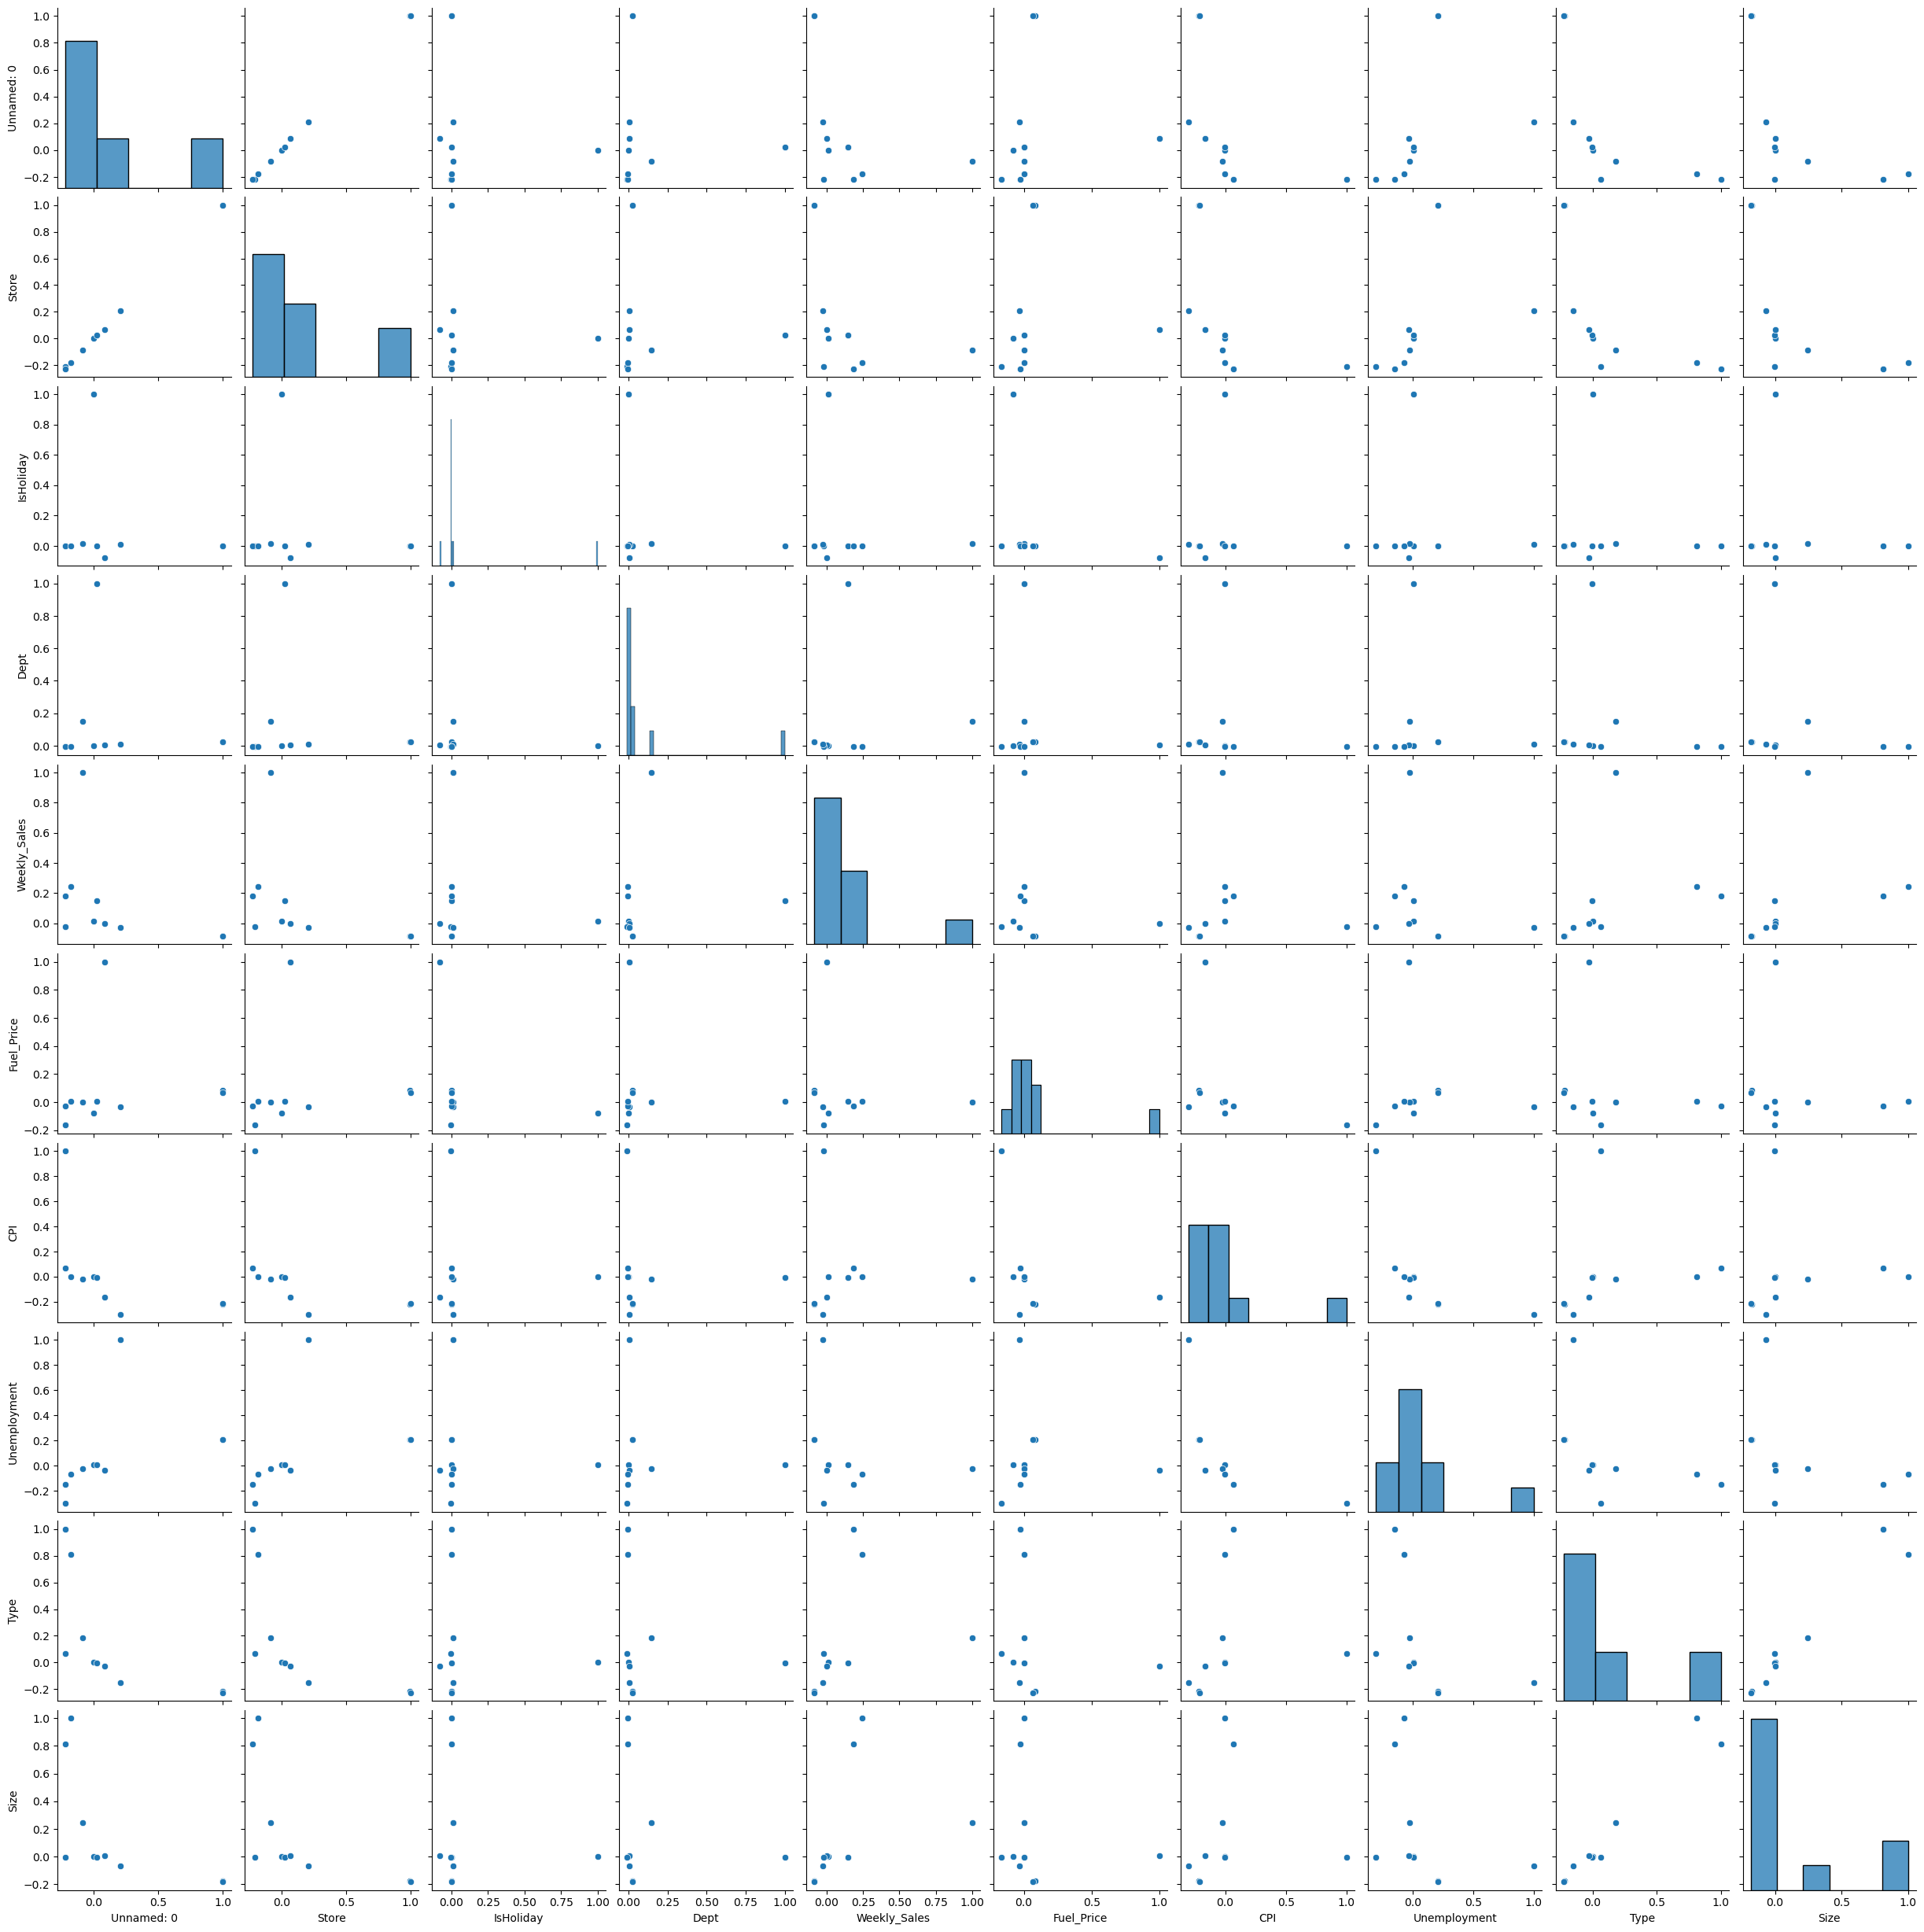

In [143]:
sns.pairplot(correlation)
#Plot pairwise relationships in a dataset.

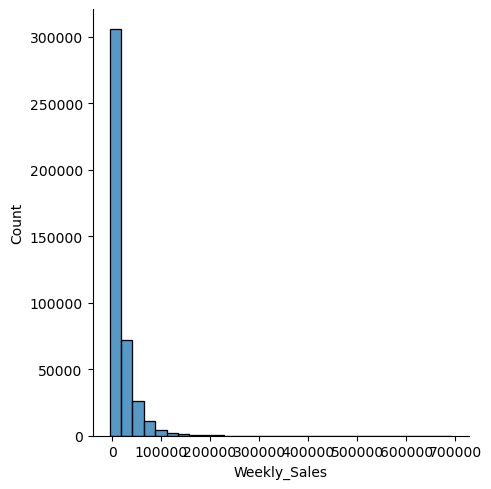

In [144]:
sns.displot(data['Weekly_Sales'], bins= 30)

In [145]:
#Assigning dataset into X and Y

In [146]:
data.head(10)

,Unnamed: 0,Store,IsHoliday,Dept,Weekly_Sales,Fuel_Price,CPI,Unemployment,Type,Size
0,0,1,0,1.0,24924.50,2.572,211.096358,8.106,3,151315
1,1,1,0,26.0,11737.12,2.572,211.096358,8.106,3,151315
2,2,1,0,17.0,13223.76,2.572,211.096358,8.106,3,151315
3,3,1,0,45.0,37.44,2.572,211.096358,8.106,3,151315
4,4,1,0,28.0,1085.29,2.572,211.096358,8.106,3,151315
5,5,1,0,79.0,46729.77,2.572,211.096358,8.106,3,151315
6,6,1,0,55.0,21249.31,2.572,211.096358,8.106,3,151315
7,7,1,0,5.0,32229.38,2.572,211.096358,8.106,3,151315
8,8,1,0,58.0,7659.97,2.572,211.096358,8.106,3,151315
9,9,1,0,7.0,21084.08,2.572,211.096358,8.106,3,151315


In [147]:
X = data.iloc[:, 2:10] #X represents the input dataset for both train and test case
X

,IsHoliday,Dept,Weekly_Sales,Fuel_Price,CPI,Unemployment,Type,Size
0,0,1.0,24924.50,2.572,211.096358,8.106,3,151315
1,0,26.0,11737.12,2.572,211.096358,8.106,3,151315
2,0,17.0,13223.76,2.572,211.096358,8.106,3,151315
3,0,45.0,37.44,2.572,211.096358,8.106,3,151315
4,0,28.0,1085.29,2.572,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...
421565,0,13.0,26240.14,3.882,192.308899,8.667,2,118221
421566,0,16.0,2660.02,3.882,192.308899,8.667,2,118221
421567,0,32.0,4131.54,3.882,192.308899,8.667,2,118221
421568,0,83.0,717.82,3.882,192.308899,8.667,2,118221


In [148]:
Y = data.iloc[:, 1] #Y represents the ideal output (correct output) data for both train and test case
Y 

0          1
1          1
2          1
3          1
4          1
          ..
421565    45
421566    45
421567    45
421568    45
421569    45
Name: Store, Length: 421570, dtype: int64

In [149]:
from sklearn.model_selection import train_test_split #train_test_split splits a dataset into X_train, X_test, Y_train, Y_test which are input and output (ideal) data for both training set and test set respectively. Also, here, test_case is '0.2' which indicates that the dataset will be divided into 20% test data and 80% training data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((337256, 8), (337256,), (84314, 8), (84314,))

In [150]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()  #This creates an object of the DecisionTreeClassifier() class for passing the values of X and Y for model training
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [151]:
parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 15, None],
    "splitter": ["best", "random"]
} #Preparing parameters for GridSearchCV

In [152]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid= parameters, cv = 10, n_jobs=-1) #creating an object of the GridSearchCV class for parameters to be passed.
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'splitter': ['best', 'random']})

In [153]:
grid.fit(X_train, Y_train) #Passing X_train and Y_train for GridSearchCV to help find best parameters for this model.

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'splitter': ['best', 'random']})

In [154]:
grid.best_params_ #displays the best(ideal) parameters for Classifier Model for best accuracy

{'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}

In [155]:
grid.best_score_ #Displays highest possible accuracy with the best possible set of parameters

1.0

In [156]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "gini", max_depth = None, splitter = "best")  #This creates an object of the DecisionTreeClassifier() class for passing the values of X and Y for model training
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [157]:
y_pred = model.predict(X_test) #generate a prediction matrix for predicted values for comparing to original values = Y_test.

In [158]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred) #Generate a table that is used to define the performance of a classification algorithm.
print(cm)

[[2008    0    0 ...    0    0    0]
 [   0 2002    0 ...    0    0    0]
 [   0    0 1758 ...    0    0    0]
 ...
 [   0    0    0 ... 1343    0    0]
 [   0    0    0 ...    0 1453    0]
 [   0    0    0 ...    0    0 1963]]


In [159]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, y_pred, average='weighted') 
print(f1) #prints the f1 score of the model.

1.0


In [160]:
from sklearn.metrics import accuracy_score
print (accuracy_score(Y_test, y_pred)) #prints the accuracy score of the model.

1.0


In [162]:
#As we see, the accuracy of the model is 1, i.e. 100% means it has succesfully predicted all the 'Store' values correctly as expected. 

[Text(0.8915343915343915, 0.9833333333333333, 'x[7] <= 213560.5\ngini = 0.977\nsamples = 337256\nvalue = [8236, 8236, 7278, 8197, 7149, 8171, 7803, 7886, 7059\n8182, 8114, 7783, 8349, 8041, 7887, 7520, 7842, 7894\n8125, 8150, 7607, 7751, 8023, 8211, 7868, 7894, 8229\n8167, 7683, 5761, 8082, 8194, 5193, 8166, 7592, 5012\n5758, 5912, 7885, 8036, 8002, 5530, 5408, 5716, 7674]'),
 Text(0.8703703703703703, 0.95, 'x[7] <= 205023.5\ngini = 0.977\nsamples = 328907\nvalue = [8236, 8236, 7278, 8197, 7149, 8171, 7803, 7886, 7059\n8182, 8114, 7783, 0, 8041, 7887, 7520, 7842, 7894\n8125, 8150, 7607, 7751, 8023, 8211, 7868, 7894, 8229\n8167, 7683, 5761, 8082, 8194, 5193, 8166, 7592, 5012\n5758, 5912, 7885, 8036, 8002, 5530, 5408, 5716, 7674]'),
 Text(0.8042328042328042, 0.9166666666666666, 'x[7] <= 204001.5\ngini = 0.975\nsamples = 304429\nvalue = [8236, 8236, 7278, 0, 7149, 8171, 7803, 7886, 7059\n8182, 0, 7783, 0, 8041, 7887, 7520, 7842, 7894, 8125\n8150, 7607, 7751, 8023, 8211, 7868, 7894, 8229, 

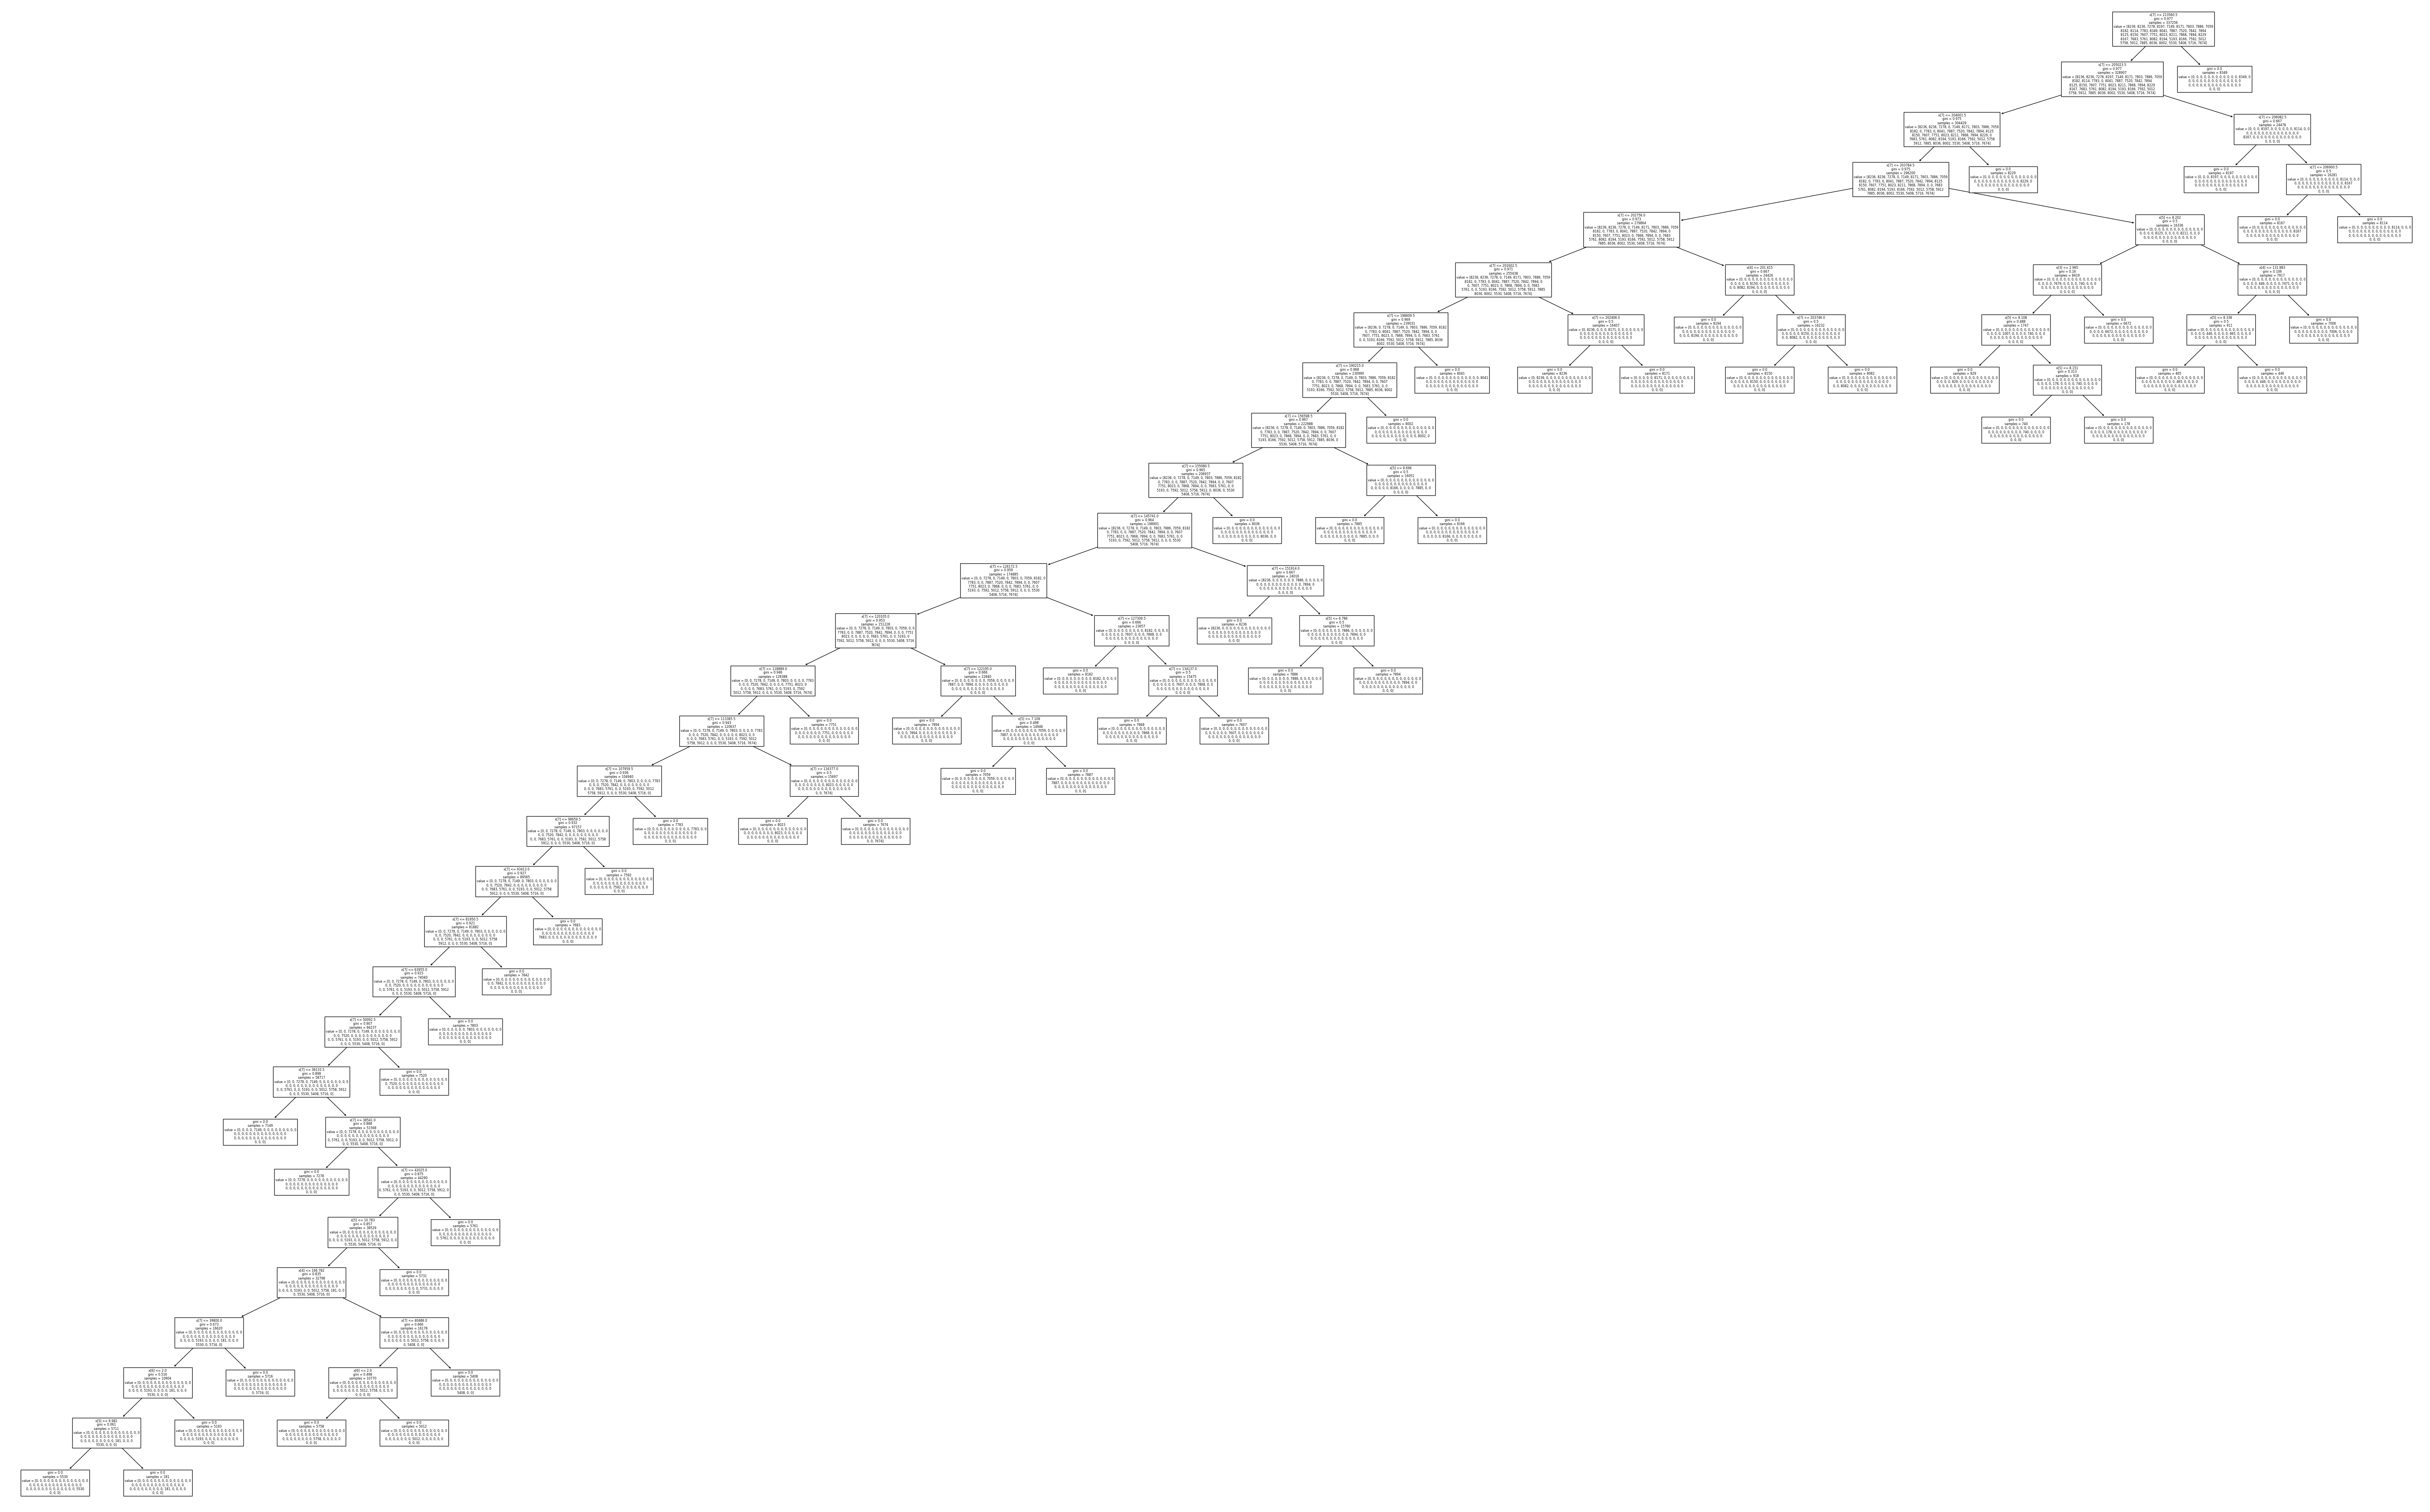

In [163]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
plot_tree(model) # Finally, generate a model for the decision tree model that we generated earlier as 'model'.

In [ ]:
#Thus, this concludes the data analysis and the process of correctly training the "Decision Tree Classifier Model" wherein we achieved a prediction of 100 % (1.0).